In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
imbook = cv2.imread('./book.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)
# print(imbook.shape)

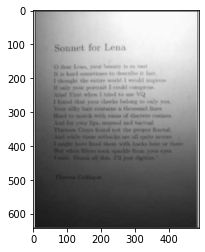

In [3]:
plt.imshow(imbook,cmap = "gray")

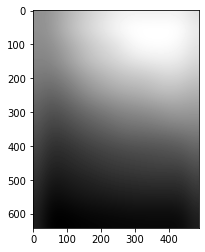

In [4]:
from scipy import ndimage as flt
fltbook = flt.gaussian_filter(imbook, sigma = 30)
plt.imshow(fltbook,cmap = "gray")

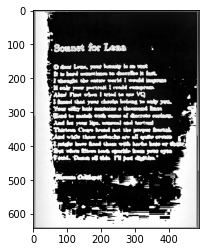

In [5]:
plt.imshow(imbook-fltbook, cmap='gray')

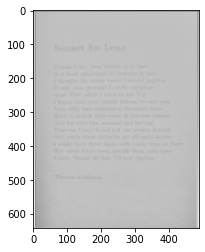

In [6]:
import numpy as np
res = np.log10(imbook) - np.log10(fltbook)
# print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
# print(minres,maxres)
plt.imshow(res, cmap='gray')

# Task

Реализовать функцию flt.gaussian_filter только с использование numpy 


In [94]:
import numpy

def gaussian_filter(input, sigma, order=0, output=None, mode="reflect"):
    input = numpy.asarray(input)
    fltbook, output = _get_output(output, input)
    orders = _normalize_sequence(order, input.ndim)
    sigmas = _normalize_sequence(sigma, input.ndim)
    modes = _normalize_sequence(mode, input.ndim)
    axes = list(range(input.ndim))
    axes = [(axes[ii], sigmas[ii], orders[ii], modes[ii])
            for ii in range(len(axes)) if sigmas[ii] > 1e-15]
    print(len(axes))
    output[...] = input[...]
    return fltbook, output


def _get_output(output, input, shape=None, complex_output=False):
    if shape is None:
        shape = input.shape
    if output is None:
        if not complex_output:
            output = numpy.zeros(shape, dtype=input.dtype.name)
        else:
            complex_type = numpy.promote_types(input.dtype, numpy.complex64)
            output = numpy.zeros(shape, dtype=complex_type)
    elif isinstance(output, (type, numpy.dtype)):
        # Classes (like `np.float32`) and dtypes are interpreted as dtype
        if complex_output and numpy.dtype(output).kind != 'c':
            output = numpy.promote_types(output, numpy.complex64)
        output = numpy.zeros(shape, dtype=output)
    elif isinstance(output, str):
        output = numpy.typeDict[output]
        output = numpy.zeros(shape, dtype=output)
    return fltbook, output


def _normalize_sequence(input, rank):
    normalized = [input] * rank
    return normalized


def gaussian_filter1d(input, sigma, axis=-1, order=0, output=None,
                      mode="reflect", cval=0.0, truncate=4.0):
    sd = float(sigma)
    # make the radius of the filter equal to truncate standard deviations
    lw = int(truncate * sd + 0.5)
    # Since we are calling correlate, not convolve, revert the kernel
    weights = _gaussian_kernel1d(sigma, order, lw)[::-1]
    return correlate1d(input, weights, axis, output, mode, cval, 0)

def _gaussian_kernel1d(sigma, order, radius):
    exponent_range = numpy.arange(order + 1)
    sigma2 = sigma * sigma
    x = numpy.arange(-radius, radius+1)
    phi_x = numpy.exp(-0.5 / sigma2 * x ** 2)
    phi_x = phi_x / phi_x.sum()

    if order == 0:
        return phi_x
    else:
        q = numpy.zeros(order + 1)
        q[0] = 1
        D = numpy.diag(exponent_range[1:], 1)  # D @ q(x) = q'(x)
        P = numpy.diag(numpy.ones(order)/-sigma2, -1)  # P @ q(x) = q(x) * p'(x)
        Q_deriv = D + P
        for _ in range(order):
            q = Q_deriv.dot(q)
        q = (x[:, None] ** exponent_range).dot(q)
        return q * phi_x


def correlate1d(input, weights, axis=-1, output=None, mode="reflect",
                cval=0.0, origin=0):
    input = numpy.asarray(input)
    weights = numpy.asarray(weights)
    complex_input = input.dtype.kind == 'c'
    complex_weights = weights.dtype.kind == 'c'
    if complex_input or complex_weights:
        if complex_weights:
            weights = weights.conj()
            weights = weights.astype(numpy.complex128, copy=False)
        kwargs = dict(axis=axis, mode=mode, origin=origin)
        output = _get_output(output, input, complex_output=True)
        return _complex_via_real_components(correlate1d, input, weights,
                                            output, cval, **kwargs)

    output = _get_output(output, input)
    return output


def _complex_via_real_components(func, input, weights, output, cval, **kwargs):
    complex_input = input.dtype.kind == 'c'
    complex_weights = weights.dtype.kind == 'c'
    if complex_input and complex_weights:
        # real component of the output
        func(input.real, weights.real, output=output.real,
             cval=numpy.real(cval), **kwargs)
        output.real -= func(input.imag, weights.imag, output=None,
                            cval=numpy.imag(cval), **kwargs)
        # imaginary component of the output
        func(input.real, weights.imag, output=output.imag,
             cval=numpy.real(cval), **kwargs)
        output.imag += func(input.imag, weights.real, output=None,
                            cval=numpy.imag(cval), **kwargs)
    elif complex_input:
        func(input.real, weights, output=output.real, cval=numpy.real(cval),
             **kwargs)
        func(input.imag, weights, output=output.imag, cval=numpy.imag(cval),
             **kwargs)
    else:
        if numpy.iscomplexobj(cval):
            raise ValueError("Cannot provide a complex-valued cval when the "
                             "input is real.")
        func(input, weights.real, output=output.real, cval=cval, **kwargs)
        func(input, weights.imag, output=output.imag, cval=cval, **kwargs)
    return output

2


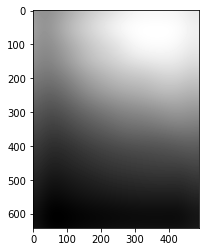

In [95]:
fltbook, updatedImage = gaussian_filter(imbook, 30)
plt.imshow(fltbook,cmap = "gray")

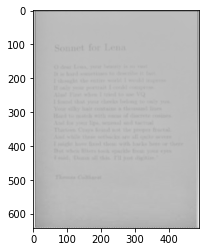

In [96]:
res = np.log10(imbook) - np.log10(fltbook)
# print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
# print(minres,maxres)
plt.imshow(res, cmap='gray')